# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [9]:
# Your code here.
import pandas as pd


student_data = pd.DataFrame({
    'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
    'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
})

print(student_data)


   Age  Tardies
0   17       10
1   51        1
2   27        5
3   21        9
4   36        4
5   48        2
6   19        9
7   26        6
8   54        0
9   30        3


Draw a dispersion diagram (scatter plot) for the data.

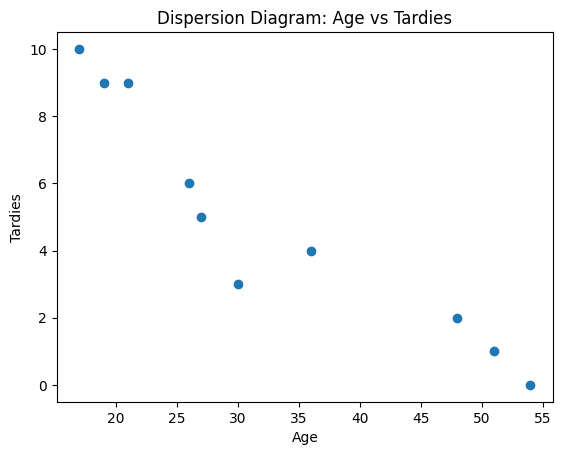

In [10]:
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.title('Dispersion Diagram: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

*your explanation here*

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [11]:
covariance = student_data.cov().iloc[0, 1]
correlation = student_data.corr().iloc[0, 1]

print(f"Covariance between Age and Tardies: {covariance}")
print(f"Correlation between Age and Tardies: {correlation}")


Covariance between Age and Tardies: -45.56666666666666
Correlation between Age and Tardies: -0.9391626886887121


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [17]:
# your explanation here
X = student_data[['Age']]   
y = student_data['Tardies'] 

# Build linear regression model
model = LinearRegression()
model.fit(X, y)

# Get regression parameters
slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression equation: Tardies = {intercept:.2f} + ({slope:.2f} * Age)")


Regression equation: Tardies = 12.89 + (-0.24 * Age)


Plot your regression model on your scatter plot.

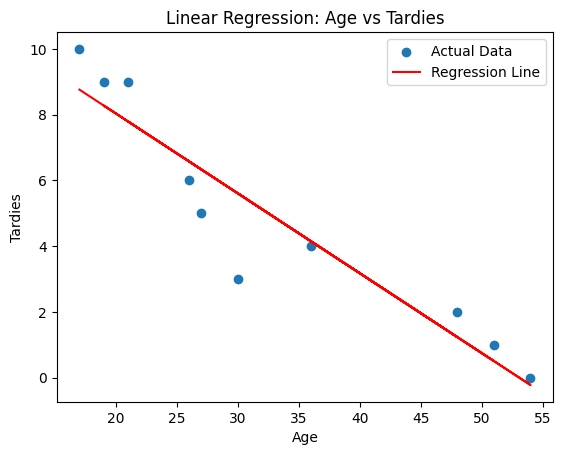

In [ ]:
# Plot scatter and regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression: Age vs Tardies')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

*your explanation here*

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [ ]:
# Import any libraries you may need & the data
vehicles = pd.read_csv(r"C:\week9\day 1\lab-regression-analysis-en\vehicles.csv")

In [20]:
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [23]:
vehicles.shape

(35952, 15)

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [27]:
columns = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
selected_data = data[columns]

In [28]:
correlations = selected_data.corr(numeric_only=True)['CO2 Emission Grams/Mile'].sort_values(ascending=False)
print("Correlation with CO2 Emission Grams/Mile:\n", correlations)

Correlation with CO2 Emission Grams/Mile:
 CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.997829
Fuel Cost/Year             0.995236
Cylinders                  0.973682
Year                      -0.118271
Combined MPG              -0.980063
Name: CO2 Emission Grams/Mile, dtype: float64


In [29]:
X = selected_data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = selected_data['CO2 Emission Grams/Mile']

model = LinearRegression()
model.fit(X, y)

# Display coefficients and intercept
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("\nRegression Coefficients:\n", coefficients)
print("\nIntercept:", intercept)


Regression Coefficients:
 Year                  1.159389
Cylinders            -6.879237
Fuel Barrels/Year    13.506215
Combined MPG         -0.960208
Fuel Cost/Year        0.027641
dtype: float64

Intercept: -2172.413705547587


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [31]:
import statsmodels.api as sm
X_const = sm.add_constant(X)

# Fit multiple linear regression model
ols_model = sm.OLS(y, X_const).fit()

# Print regression summary
print(ols_model.summary())

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.999
Model:                                 OLS   Adj. R-squared:                  0.996
Method:                      Least Squares   F-statistic:                     313.3
Date:                     Sat, 08 Nov 2025   Prob (F-statistic):            0.00319
Time:                             13:44:25   Log-Likelihood:                -19.645
No. Observations:                        8   AIC:                             51.29
Df Residuals:                            2   BIC:                             51.77
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [32]:

import pandas as pd

# Data
data = {
    'X': [1, 3, 4, 6, 8, 9, 11, 14],
    'Y': [1, 2, 4, 4, 5, 7, 8, 13]
}

# Create DataFrame
df = pd.DataFrame(data)

# Show the DataFrame
print(df)


    X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

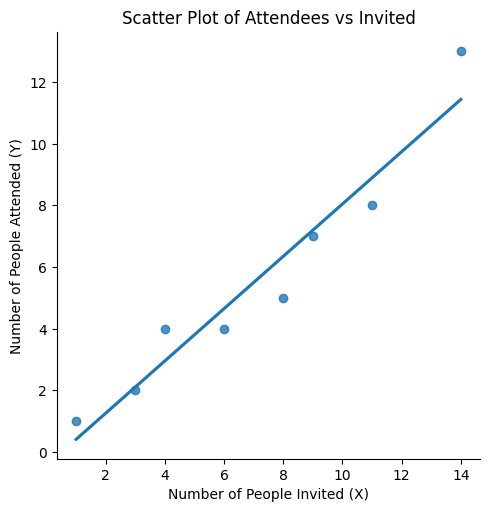

In [33]:
sns.lmplot(x='X', y='Y', data=df, ci=None)  
plt.title('Scatter Plot of Attendees vs Invited')
plt.xlabel('Number of People Invited (X)')
plt.ylabel('Number of People Attended (Y)')
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*